<a href="https://colab.research.google.com/github/KapilSareen/DAI-101_assignments/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('dataset.csv')
print(df.head(5))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


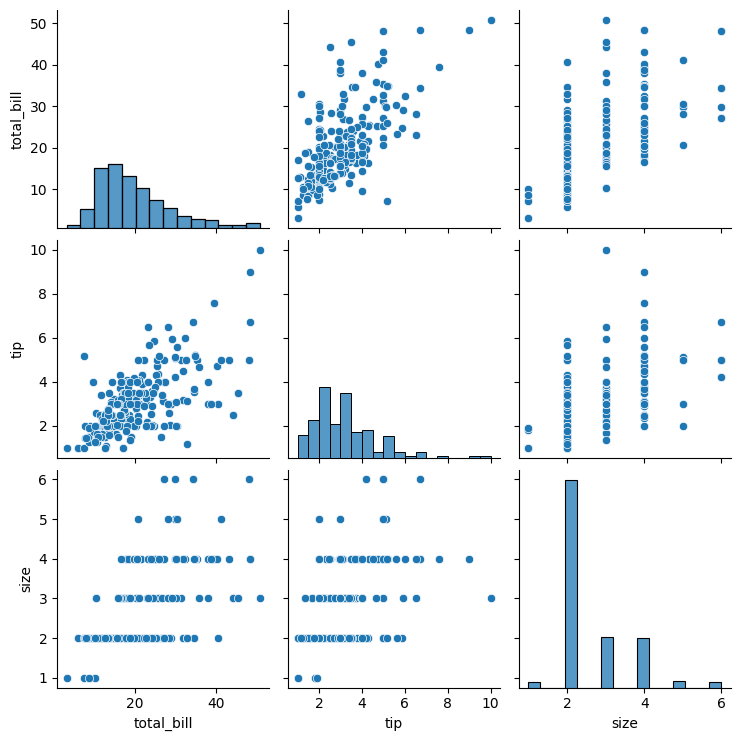

In [ ]:
sns.pairplot(df)
plt.show()


### So from these graphics, we can conclude that relation between size v/s tip and total_bill v/s tip are noticeable.

### Now let's check for categorical columns.

In [ ]:

from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])


df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


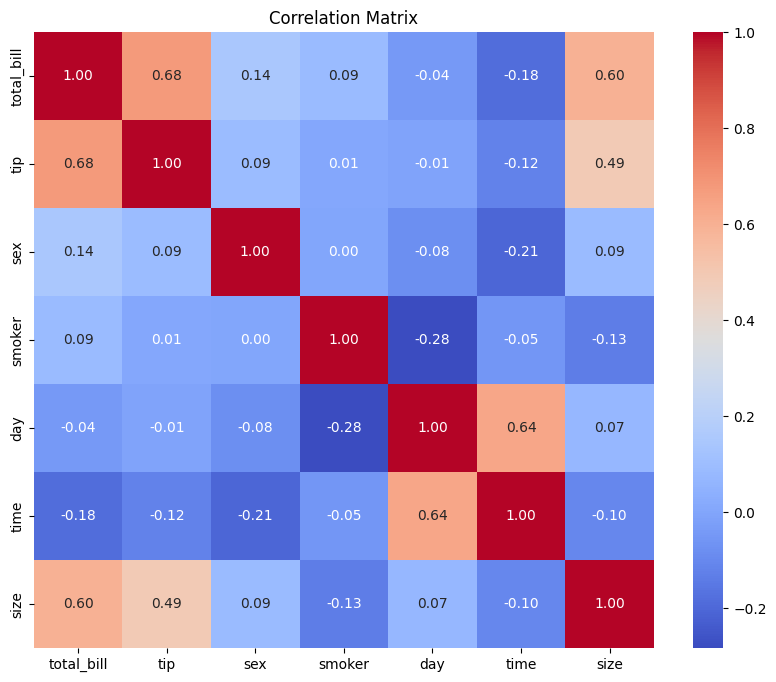

In [ ]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### The Categorical Data seems very much less related but let's take sex and time under consideration as well
### So now our important features are : total_bill, sex, time and size

In [ ]:
import statsmodels.stats.api as sms
import statsmodels.regression.linear_model as smf

df_data = df.drop(columns=['tip'])
df_target = df['tip']
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=42)


def Rainbow_lin_test(Y,X):
  model =smf.OLS(Y,X).fit()
  lin_p =sms.linear_rainbow (model, frac= 0.5) [1]
  print(lin_p)

Rainbow_lin_test(df_target,df_data)


0.14110495805391068


### As p > 0.05, there is insufficient evidence to reject the null hypothesis, suggesting that the linear model is a good fit, and the relationship is likely linear.

## Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression R2 score:", r2_lr)

Linear Regression R2 score: 0.4441368826121932


# Lasso Regression
  

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression R2 score:", r2_lasso)

Lasso Regression R2 score: 0.5273068720881755


## Ridge Regression

In [ ]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))


Ridge Regression R2: 0.44430598506242824


## Decision Tree

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

y_pred_tree = tree_reg.predict(X_test)

print('Decision Tree R2:', r2_score(y_test, y_pred_tree))



Decision Tree R2: -0.06402275877244601


## Random Forests


In [ ]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))


Random Forest R2: 0.23359000437227717


## **Support Vector Regression (SVR)**


In [ ]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

print('SVR R2:', r2_score(y_test, y_pred_svr))

SVR R2: 0.5693326496439823


## **K-Nearest Neighbors (KNN) Regression**
  

In [ ]:

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print('KNN Regression R2:', r2_score(y_test, y_pred_knn))

KNN Regression R2: 0.3294034029001649


### To determine the best model, we will use the mean R² from 5-fold cross-validation as the deciding factor.


In [ ]:
def evaluate_model(model, X, y):
  cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
  return cv_scores.mean(), cv_scores.std()

model_results = {}


# Linear Regression
lr_model = LinearRegression()
mean_r2_lr, std_r2_lr = evaluate_model(lr_model, X_train, y_train)
model_results['Linear Regression'] = {'mean_r2': mean_r2_lr, 'std_r2': std_r2_lr}


# Lasso Regression
lasso_model = Lasso(alpha=0.1)
mean_r2_lasso, std_r2_lasso = evaluate_model(lasso_model, X_train, y_train)
model_results['Lasso Regression'] = {'mean_r2': mean_r2_lasso, 'std_r2': std_r2_lasso}


# Ridge Regression
ridge_model = Ridge(alpha=0.1)
mean_r2_ridge, std_r2_ridge = evaluate_model(ridge_model, X_train, y_train)
model_results['Ridge Regression'] = {'mean_r2': mean_r2_ridge, 'std_r2': std_r2_ridge}


# Decision Tree
tree_model = DecisionTreeRegressor(random_state=0)
mean_r2_tree, std_r2_tree = evaluate_model(tree_model, X_train, y_train)
model_results['Decision Tree'] = {'mean_r2': mean_r2_tree, 'std_r2': std_r2_tree}


# Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=0)
mean_r2_forest, std_r2_forest = evaluate_model(forest_model, X_train, y_train)
model_results['Random Forest'] = {'mean_r2': mean_r2_forest, 'std_r2': std_r2_forest}


# Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf')
mean_r2_svr, std_r2_svr = evaluate_model(svr_model, X_train, y_train)
model_results['SVR'] = {'mean_r2': mean_r2_svr, 'std_r2': std_r2_svr}


# K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
mean_r2_knn, std_r2_knn = evaluate_model(knn_model, X_train, y_train)
model_results['KNN Regression'] = {'mean_r2': mean_r2_knn, 'std_r2': std_r2_knn}


print("Model Performance:")
print("{:<20} {:<15} {:<15}".format("Model", "Mean R2", "Std R2"))
for model_name, results in model_results.items():
  print("{:<20} {:<15.4f} {:<15.4f}".format(model_name, results['mean_r2'], results['std_r2']))


# Find the best model based on mean R2 score
best_model_name = max(model_results, key=lambda k: model_results[k]['mean_r2'])
print("\nBest Model based on Mean R2:", best_model_name)

Model Performance:
Model                Mean R2         Std R2         
Linear Regression    0.3192          0.2757         
Lasso Regression     0.3447          0.2217         
Ridge Regression     0.3193          0.2755         
Decision Tree        -0.2933         0.6753         
Random Forest        0.3279          0.2499         
SVR                  0.2634          0.1441         
KNN Regression       0.2238          0.1503         

Best Model based on Mean R2: Lasso Regression


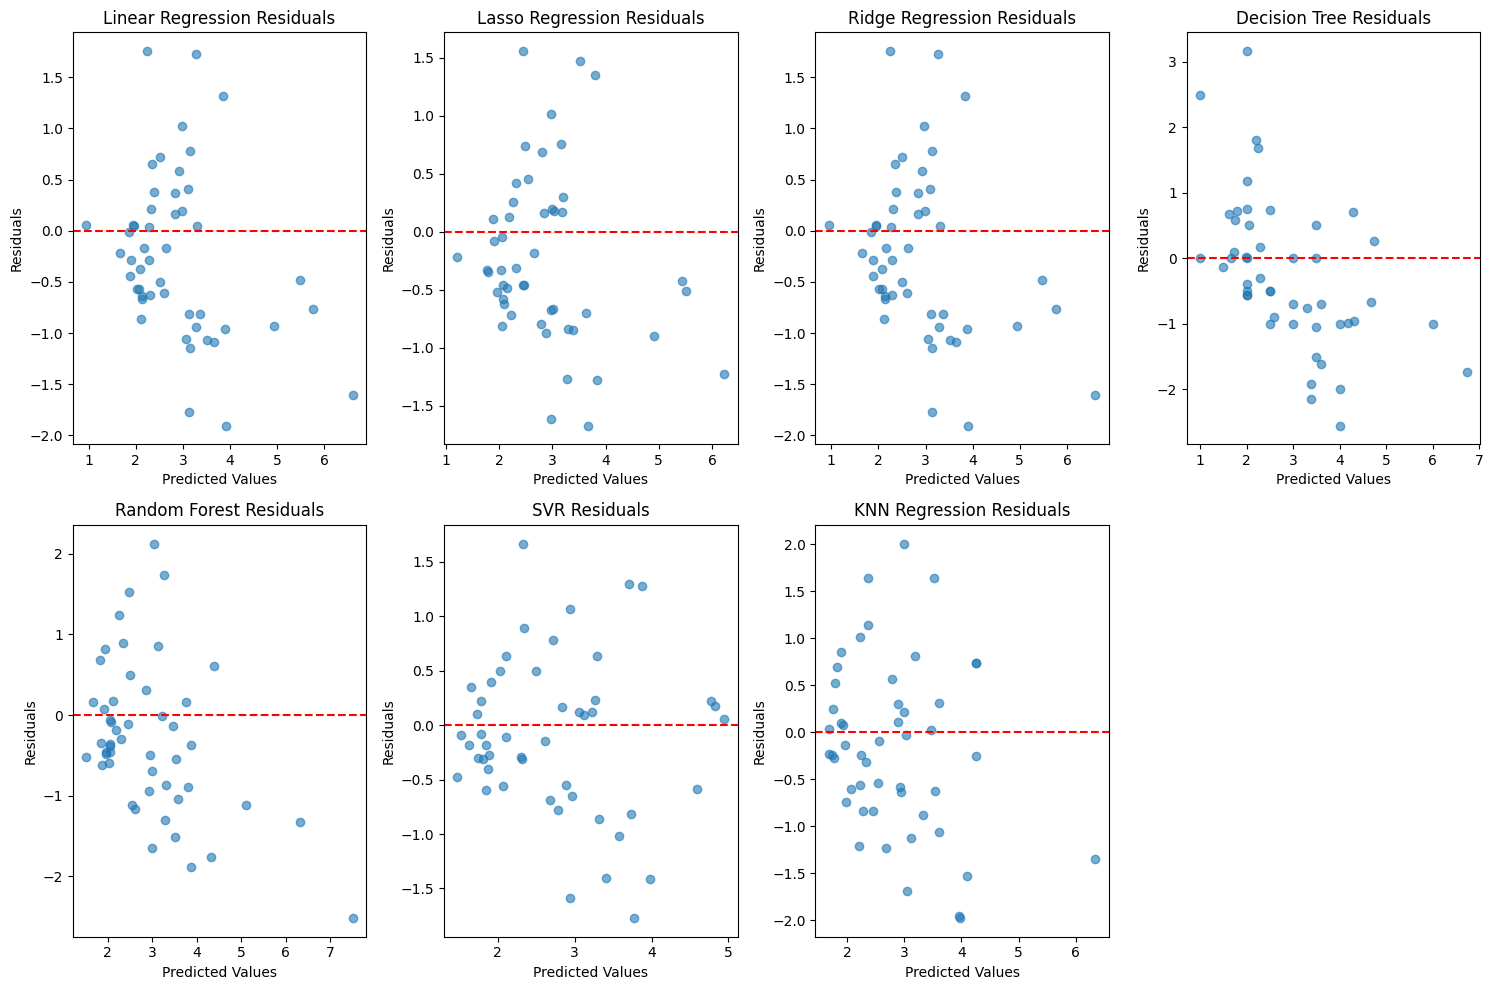

In [152]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the models
models = {
    'Linear Regression': lr_model,
    'Lasso Regression': lasso_model,
    'Ridge Regression': ridge_model,
    'Decision Tree': tree_model,
    'Random Forest': forest_model,
    'SVR': svr_model,
    'KNN Regression': knn_model
}

n_models = len(models)
n_cols = 4
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    residuals = y_test - y_pred

    axes[i].scatter(y_pred, residuals, alpha=0.6)
    axes[i].axhline(y=0, color='red', linestyle='--')
    axes[i].set_xlabel('Predicted Values')
    axes[i].set_ylabel('Residuals')
    axes[i].set_title(f'{model_name} Residuals')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Based on the results, we conclude that Lasso Regression is the most suitable model for our analysis, as it highlights the total bill as the most important feature for predicting the tip.


### According to Lasso Regression, all parameters are deemed insignificant compared to the total bill when predicting the tip, making the total bill the most important feature in the model.


Lasso Regression Coefficients:
      feature      coef  abs_coef
5        size  0.108081  0.108081
0  total_bill  0.099099  0.099099
1         sex  0.000000  0.000000
2      smoker -0.000000  0.000000
3         day  0.000000  0.000000
4        time  0.000000  0.000000


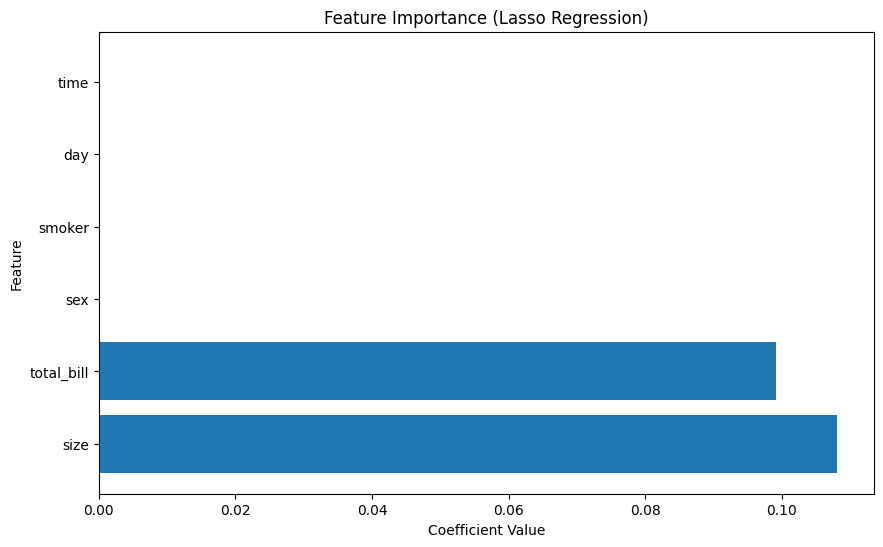

In [145]:
lasso_coef = pd.DataFrame({'feature': X_train.columns, 'coef': lasso_model.coef_})

lasso_coef['abs_coef'] = lasso_coef['coef'].abs()
lasso_coef = lasso_coef.sort_values('abs_coef', ascending=False)

print("Lasso Regression Coefficients:")
print(lasso_coef)

plt.figure(figsize=(10, 6))
plt.barh(lasso_coef['feature'], lasso_coef['coef'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Lasso Regression)')
plt.show()


### Now to find about seconday factors ,let's find out coefficient weights of our second best model: Random Forests

Random Forest Feature Importances:
      feature  importance
0  total_bill    0.767205
2      smoker    0.066126
3         day    0.063527
5        size    0.063388
1         sex    0.027505
4        time    0.012249


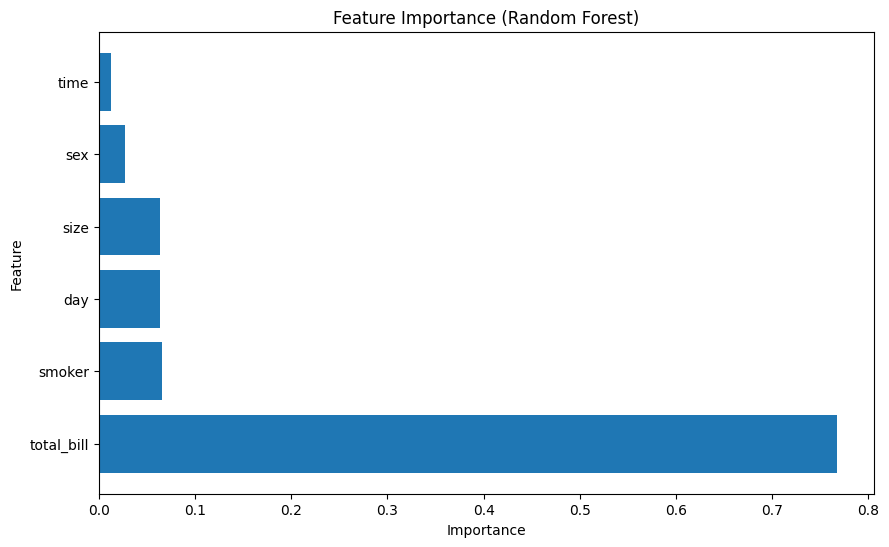

In [146]:
importances = forest_reg.feature_importances_
feature_names = X_train.columns

feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

print("Random Forest Feature Importances:")
print(feature_importances_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

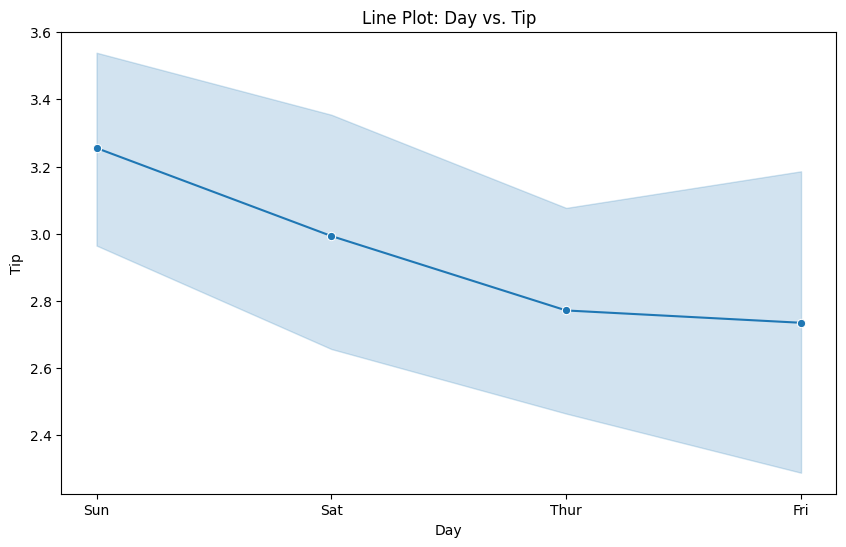

In [147]:
new_df = pd.read_csv('dataset.csv')

# Assuming 'day' is the column representing the day (encoded numerically)
plt.figure(figsize=(10, 6))
sns.lineplot(data=new_df, x="day", y="tip", estimator="mean", marker="o")
plt.xlabel('Day')
plt.ylabel('Tip')
plt.title('Line Plot: Day vs. Tip')
plt.show()

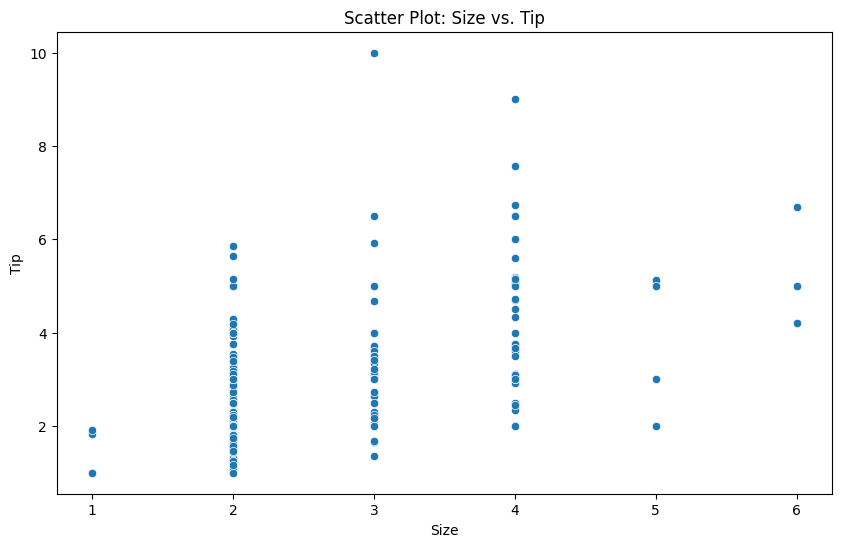

In [148]:
# prompt: plot size vs tip from new_df

plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x="size", y="tip")
plt.xlabel('Size')
plt.ylabel('Tip')
plt.title('Scatter Plot: Size vs. Tip')
plt.show()

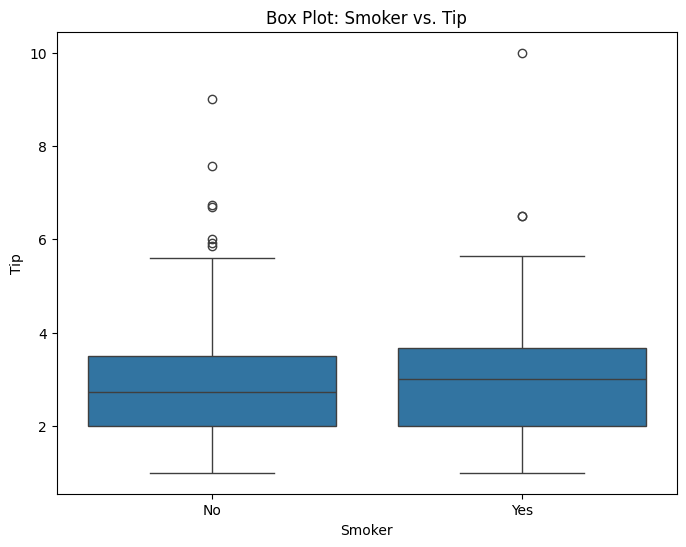

In [149]:
# prompt: draw relation between smoker and tip

plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='tip', data=new_df)
plt.xlabel('Smoker')
plt.ylabel('Tip')
plt.title('Box Plot: Smoker vs. Tip')
plt.show()

# Conclusion

### In summary, our analysis shows that:
- **Total Bill** is the most influential feature in predicting tip amount, as identified by Lasso Regression.
- **Tip Amounts** are highest on weekends, gradually decreasing towards Friday.
- **Smokers** tend to tip more frequently than non-smokers.
- **Tip Amount** increases with party size up to a certain point, after which it begins to decline.
- **Time** and **sex** are comparitively insignificant